In [29]:
import torch
import torch.nn as nn

In [54]:
def f(x):
    return - x + 4 * x ** 2 - 2 + 4 * torch.sin(8 * x)

x_train = (torch.rand(1000, 1) * 20 - 10).reshape(-1,1)
y_train = f(x_train)

In [55]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 1024)
        self.layer2 = nn.Linear(1024, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch {epoch}: {loss.item()}')

Epoch 0: 28966.416015625
Epoch 50: 9770.43359375
Epoch 100: 2797.049072265625
Epoch 150: 2101.003173828125
Epoch 200: 1983.0
Epoch 250: 1872.5777587890625
Epoch 300: 1768.052001953125
Epoch 350: 1666.7044677734375
Epoch 400: 1567.5220947265625
Epoch 450: 1469.685791015625


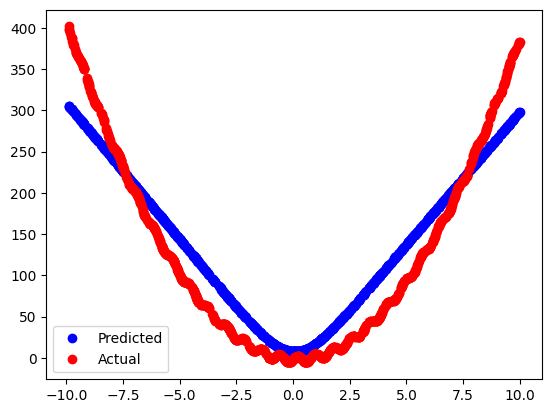

In [57]:
import matplotlib.pyplot as plt
y_pred = model(x_train).detach().numpy()
y_train_np = y_train.numpy()
plt.plot(x_train, y_pred, 'bo', label='Predicted')
plt.plot(x_train, y_train_np, 'ro', label='Actual')
plt.legend()
plt.show()